In [14]:
# -------------------------------
# Import libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# -------------------------------
# Step 1: Data Preprocessing
# -------------------------------
# Drop ID column (not useful for ML)
if "Person ID" in df.columns:
    df = df.drop(columns=["Person ID"])

# Fix 'Blood Pressure' column (if exists, e.g., values like "125/80")
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].str.split("/", expand=True)
    df["Systolic"] = pd.to_numeric(bp_split[0], errors="coerce")
    df["Diastolic"] = pd.to_numeric(bp_split[1], errors="coerce")
    df = df.drop(columns=["Blood Pressure"])

# Encode categorical features (separate encoder per column)
for col in ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Sleep Disorder"])
y = df["Sleep Disorder"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test = scaler.transform(X_test.select_dtypes(include=[np.number]))

# -------------------------------
# Step 2: Model Training
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# -------------------------------
# Step 3: Best Model Selection
# -------------------------------
best_model_name = max(results, key=results.get)
print("\n✅ Best Model is:", best_model_name, "with accuracy:", results[best_model_name])

# Retrain best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Save best model
joblib.dump(best_model, "best_sleep_model.pkl")
print("\n💾 Best model saved as 'best_sleep_model.pkl'")



Logistic Regression Accuracy: 0.9067
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.78      0.88      0.82        16
           2       0.98      0.95      0.97        44

    accuracy                           0.91        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75


Random Forest Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88      0.88      0.88        16
           2       0.98      0.95      0.97        44

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.93      0.93      0.93        75


Gradient Boosting Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88


Logistic Regression Accuracy: 0.9067
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.78      0.88      0.82        16
           2       0.98      0.95      0.97        44

    accuracy                           0.91        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75


Random Forest Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88      0.88      0.88        16
           2       0.98      0.95      0.97        44

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.93      0.93      0.93        75


Gradient Boosting Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88

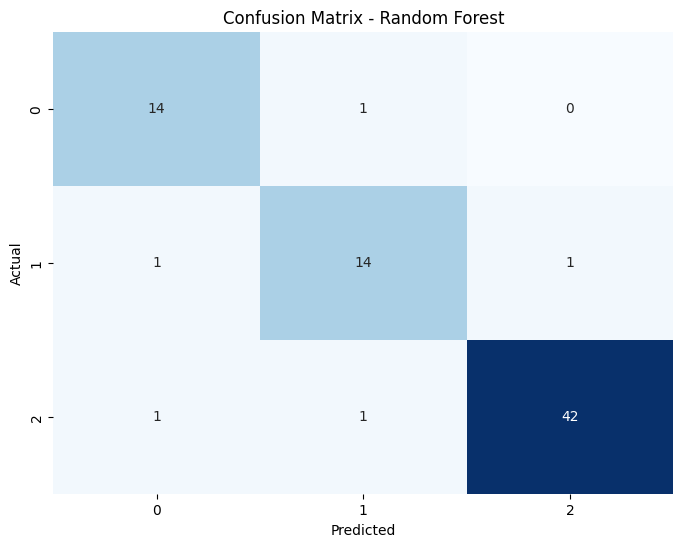

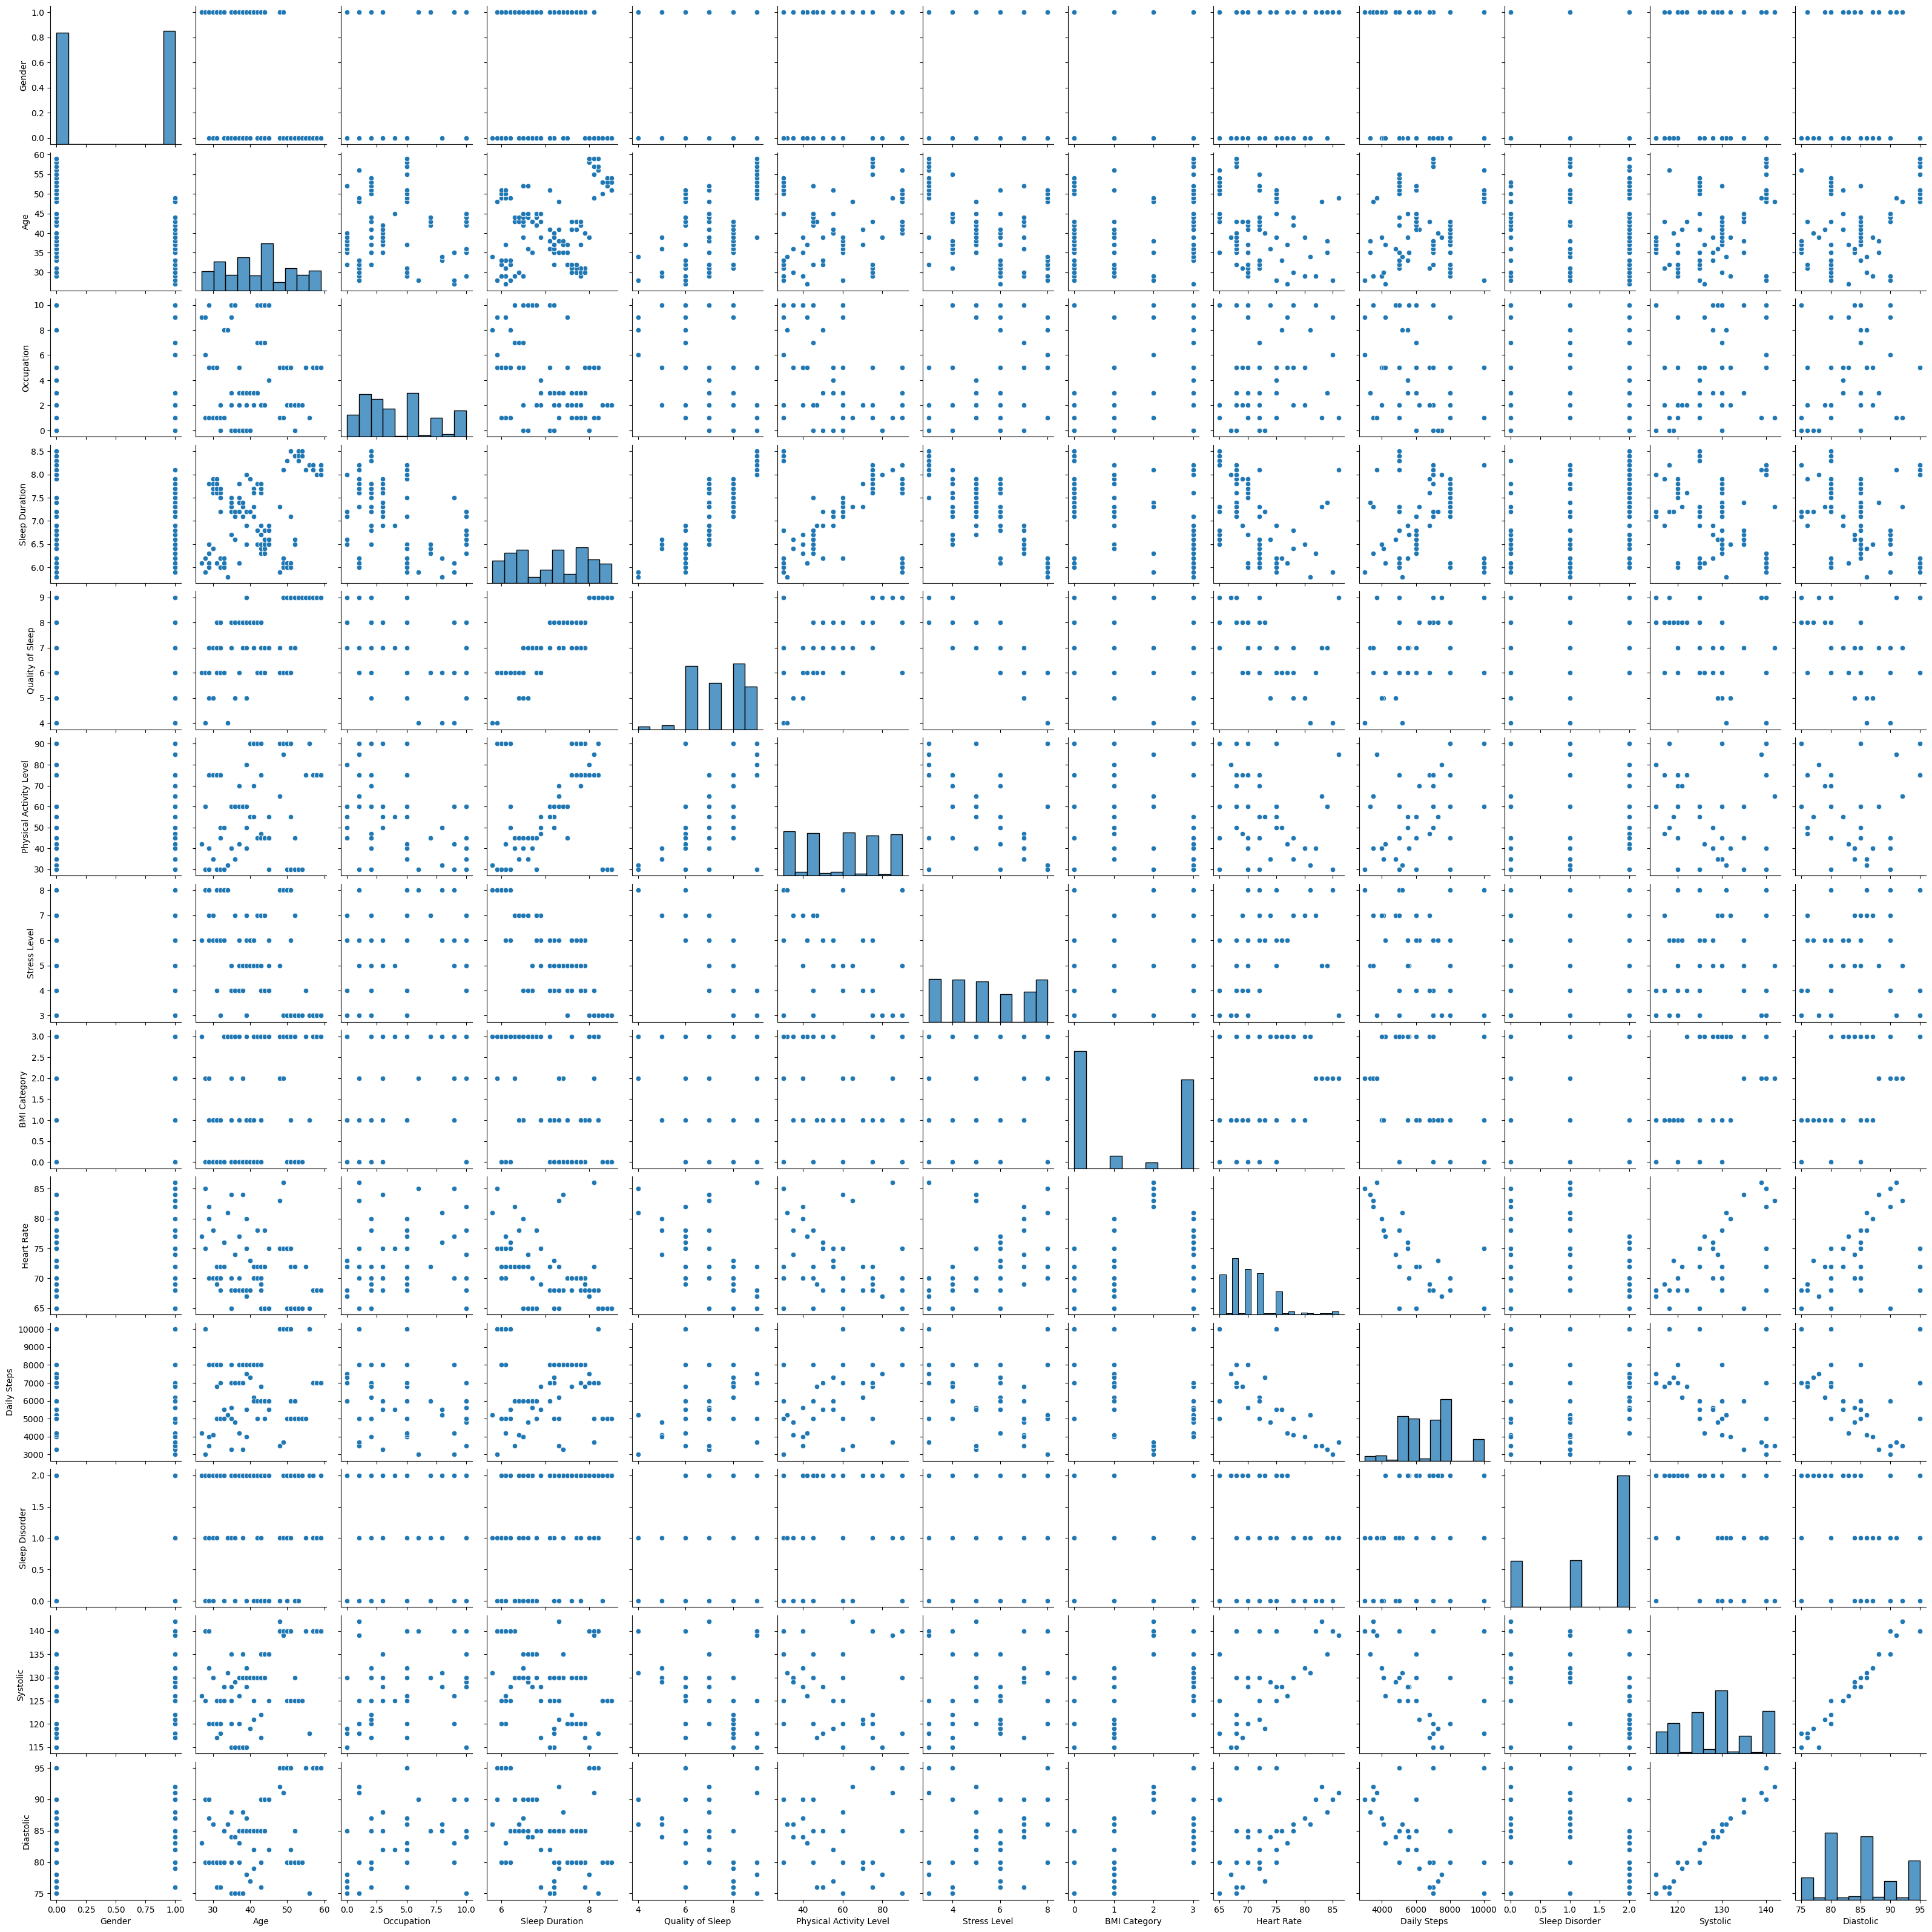

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Step 1: Data Preprocessing
# Drop ID column
if "Person ID" in df.columns:
    df = df.drop(columns=["Person ID"])
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].str.split("/", expand=True)
    df["Systolic"] = pd.to_numeric(bp_split[0], errors="coerce")
    df["Diastolic"] = pd.to_numeric(bp_split[1], errors="coerce")
    df = df.drop(columns=["Blood Pressure"])
for col in ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Sleep Disorder"])
y = df["Sleep Disorder"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Step 2: Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Step 3: Compare Models
print("\n Model Comparison Results:")
for name, acc in results.items():
    print(f"{name:20} -> Accuracy: {acc:.4f}")

best_model_name = max(results, key=results.get)
print("\n Best Model is:", best_model_name, "with accuracy:", results[best_model_name])

# Retrain best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Save best model
joblib.dump(best_model, "best_sleep_model.pkl")
print("\ Best model saved as 'best_sleep_model.pkl'")

# Step 4: Confusion Matrix Heatmap for Best 
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Visualize data
sns.pairplot(df)
plt.show()

